In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [89]:
from sklearn.datasets import load_iris

In [90]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [91]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [92]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [93]:
df['Target']=data.target

In [94]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [95]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

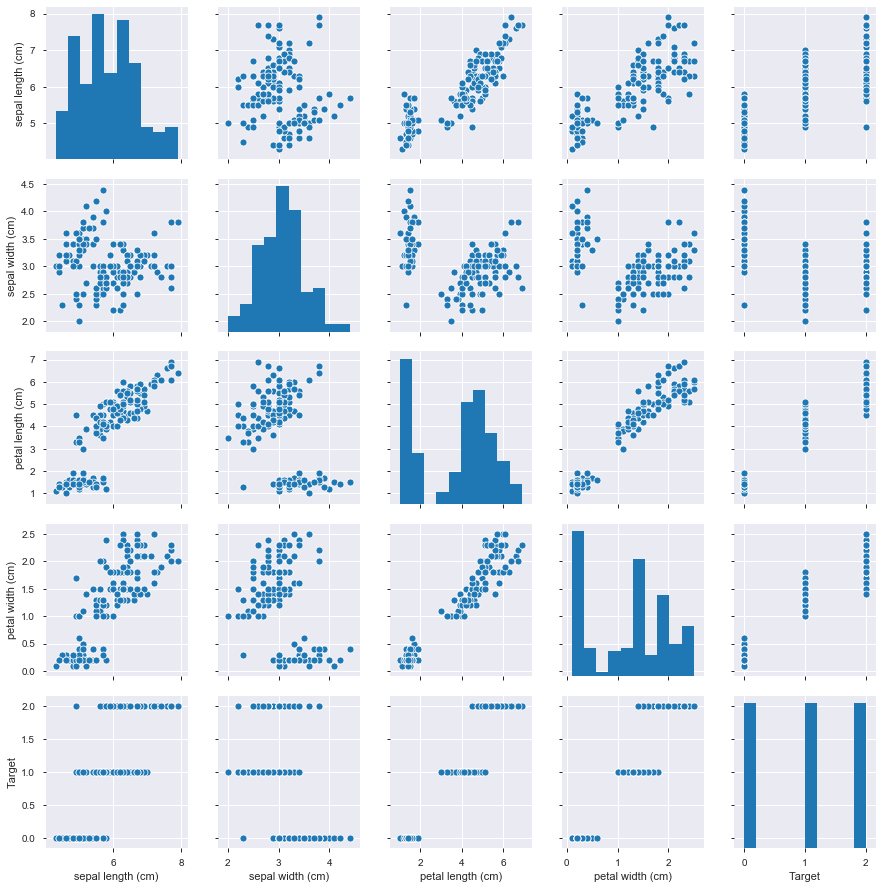

In [96]:
sns.pairplot(df)

In [97]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

In [98]:
X = df.drop('Target',axis=1)
X.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [99]:
y = df['Target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2)

In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30, 4), (120, 4), (30,), (120,))

In [103]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB

# Bernoulli

In [104]:
ber = BernoulliNB()

In [105]:
ber.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [106]:
ber.coef_

array([[-0.08004271, -0.08004271, -0.08004271, -0.08004271],
       [-0.08701138, -0.08701138, -0.08701138, -0.08701138],
       [-0.09531018, -0.09531018, -0.09531018, -0.09531018]])

In [107]:
ber.intercept_

array([-1.00330211, -1.09861229, -1.2039728 ])

In [108]:
ber.score(X_train,y_train)

0.36666666666666664

In [109]:
ber.score(X_test,y_test)

0.325

In [110]:
y_pred = ber.predict(X_test)

In [111]:
pd.DataFrame({'Actual_data':y_test,
            'New_prediction':y_pred})

,Actual_data,New_prediction
64,1,0
39,0,0
89,1,0
18,0,0
66,1,0
...,...,...
62,1,0
110,2,0
2,0,0
76,1,0


In [112]:
print('number of mislabeled points out of a total %d points: %d' %(X_test.shape[0],(y_test!=y_pred).sum()))

number of mislabeled points out of a total 120 points: 81


# Multinomial

In [113]:
mlt = MultinomialNB()

In [114]:
mlt.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [115]:
mlt.coef_

array([[-0.69489086, -1.11088238, -1.96437221, -3.46225764],
       [-0.88511511, -1.6467937 , -1.2039728 , -2.35739333],
       [-0.95241946, -1.74758825, -1.12940411, -2.14751318]])

In [116]:
mlt.intercept_

array([-1.00330211, -1.09861229, -1.2039728 ])

In [117]:
mlt.score(X_train,y_train)

0.7666666666666667

In [118]:
mlt.score(X_test,y_test)

0.8416666666666667

In [119]:
y_pred =mlt.predict(X_test)

In [120]:
pd.DataFrame({'Actual_data':y_test,
            'New_prediction':y_pred})

,Actual_data,New_prediction
64,1,1
39,0,0
89,1,1
18,0,0
66,1,1
...,...,...
62,1,1
110,2,1
2,0,0
76,1,1


In [121]:
print('number of mislabelled points out of total %d points: %d' %(X_test.shape[0],(y_test!= y_pred).sum()))

number of mislabelled points out of total 120 points: 19


# Guassian

In [122]:
gua = GaussianNB()

In [123]:
gua.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [124]:
gua.score(X_train,y_train)

0.9666666666666667

In [125]:
gua.score(X_test,y_test)

0.9583333333333334

In [126]:
gua_pred = gua.predict(X_test)

In [127]:
pd.DataFrame({'Actual_data':y_test,
            'New_prediction':gua_pred})

,Actual_data,New_prediction
64,1,1
39,0,0
89,1,1
18,0,0
66,1,1
...,...,...
62,1,1
110,2,2
2,0,0
76,1,1


In [128]:
print('number of mislabelled points out of total %d points:%d' %(X_test.shape[0],(y_test!=gua_pred).sum()))

number of mislabelled points out of total 120 points:5


# Complement

In [129]:
com = ComplementNB()

In [130]:
com.fit(X_train,y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [131]:
com.coef_

array([[0.91380214, 1.70159692, 1.16275222, 2.26349217],
       [0.82829226, 1.42699096, 1.40528468, 2.55261045],
       [0.79137573, 1.3786549 , 1.46774399, 2.74237494]])

In [132]:
com.intercept_

array([-1.00330211, -1.09861229, -1.2039728 ])

In [133]:
com.score(X_train,y_train)

0.6666666666666666

In [134]:
com.score(X_test,y_test)

0.6666666666666666

In [135]:
y_pred = com.predict(X_test)

In [136]:
pd.DataFrame({'Actual_data':y_test,
             'New_prediction':y_pred})

,Actual_data,New_prediction
64,1,2
39,0,0
89,1,2
18,0,0
66,1,2
...,...,...
62,1,2
110,2,2
2,0,0
76,1,2


In [137]:
print('number of mislabelled points out of total %d points:%d' %(X_test.shape[0],(y_test!=gua_pred).sum()))

number of mislabelled points out of total 120 points:5


In [138]:
from sklearn.metrics import confusion_matrix

In [139]:
confusion_matrix(y_test,y_pred)

array([[39,  0,  0],
       [ 0,  0, 40],
       [ 0,  0, 41]], dtype=int64)

# Categorical

In [140]:
cat = CategoricalNB()

In [141]:
cat.fit(X_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [142]:
cat.coef_

[array([[-2.94443898, -2.94443898, -2.94443898, -2.94443898, -1.33500107,
         -0.86499744, -2.94443898, -2.94443898],
        [-2.89037176, -2.89037176, -2.89037176, -2.89037176, -2.89037176,
         -1.28093385, -0.94446161, -2.89037176],
        [-2.83321334, -2.83321334, -2.83321334, -2.83321334, -2.83321334,
         -2.83321334, -0.63598877, -2.14006616]]),
 array([[-2.77258872, -2.77258872, -2.07944154, -0.47000363, -2.07944154],
        [-2.7080502 , -2.7080502 , -0.51082562, -1.60943791, -2.7080502 ],
        [-2.63905733, -2.63905733, -1.02961942, -0.84729786, -2.63905733]]),
 array([[-2.89037176, -0.40546511, -2.89037176, -2.89037176, -2.89037176,
         -2.89037176, -2.89037176],
        [-2.83321334, -2.83321334, -2.83321334, -2.14006616, -0.53062825,
         -2.83321334, -2.83321334],
        [-2.77258872, -2.77258872, -2.77258872, -2.77258872, -2.07944154,
         -0.69314718, -2.07944154]]),
 array([[-0.15415068, -2.63905733, -2.63905733],
        [-2.56494936,

In [143]:
cat.intercept_

array([-1.00330211, -1.09861229, -1.2039728 ])

In [144]:
cat.score(X_train,y_train)

0.9666666666666667

In [145]:
cat.score(X_test,y_test)

0.925

In [146]:
y_pred = cat.predict(X_test)

In [147]:
pd.DataFrame({'Actual_data':y_test,
             'New_prediction':y_pred})

,Actual_data,New_prediction
64,1,1
39,0,0
89,1,1
18,0,0
66,1,1
...,...,...
62,1,1
110,2,2
2,0,0
76,1,1


In [148]:
print('number of mislabelled points out of total %d points:%d' %(X_test.shape[0],(y_test!=gua_pred).sum()))

number of mislabelled points out of total 120 points:5


In [149]:
confusion_matrix(y_test,y_pred)

array([[39,  0,  0],
       [ 0, 38,  2],
       [ 0,  7, 34]], dtype=int64)

In [150]:
from sklearn.metrics import accuracy_score, classification_report

In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.84      0.95      0.89        40
           2       0.94      0.83      0.88        41

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.92       120



In [152]:
accuracy_score(y_test,y_pred)

0.925